<a href="https://colab.research.google.com/github/WillianPrates/Analise-de-materia-prima/blob/main/Analise_de_materiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando pacotes

In [50]:
# Importa a biblioteca pandas com o alias 'pd'
import pandas as pd
# Importa a biblioteca numpy com o alias 'np'
import numpy as np
# Importa a biblioteca seaborn com o alias 'sns'
import seaborn as sns
# Importa a biblioteca matplotlib
import matplotlib
import matplotlib.pyplot as plt
# Importa a biblioteca random com o alias 'random'
import random as random
# Define a opção para exibir todas as colunas do DataFrame (sem limite de colunas visíveis)
pd.set_option('display.max_columns', None)

Carregando o conjunto de dados usando o Pandas

In [51]:
# Importa e lê o arquivo csv no data frame
df=pd.read_csv('agricultural_raw_material.csv')

Tratamentos

In [52]:
# Calcula a contagem de valores nulos em cada coluna do DataFrame
df.isnull().sum()

# Remove caracteres especiais como '%' e ',' das células do DataFrame
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)

# Substitui valores em branco por NaN
df = df.replace('', np.nan)

# Substitui o valor 'MAY90' por NaN
df = df.replace('MAY90', np.nan)

# Converte as colunas listadas em 'lst' para float.
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change",
       "Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change",
       "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change",
       "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
# Exibe os tipos de dados das colunas do DataFrame após as conversões
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [53]:
# Exibe as primeiras linhas do DataFrame
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr90,482.34,NaN,236.0,NaN,1.83,NaN,1071.63,NaN,161.20,NaN,549.91,NaN,100.00,NaN,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,491.88,10.55,99.46,0.54,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,495.39,0.71,97.90,1.57,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,485.86,1.92,96.75,1.17,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,487.52,0.34,91.89,5.02,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49


Tratamento de data

In [54]:
# Primeiro transforma todos os valores em maiúsculas, depois converte os valores da coluna 'Month' em formato de data e hora
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Define a coluna 'Month' como o índice das linhas do DataFrame, para poder indexar os dados por datas
df = df.set_index('Month')

Parametrizando dados da Analise

In [55]:
# Define o comando "%matplotlib inline" para permitir a exibição de gráficos no notebook Jupyter
%matplotlib inline
# Define o estilo de fundo do gráfico como 'darkgrid' usando a biblioteca Seaborn
sns.set_style('darkgrid')
# Define o tamanho da fonte padrão para 14
matplotlib.rcParams['font.size'] = 14
# Define o tamanho padrão da figura para 9, 5
matplotlib.rcParams['figure.figsize'] = (9, 5)
# Define a cor de fundo da figura como transparente
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de Calor**

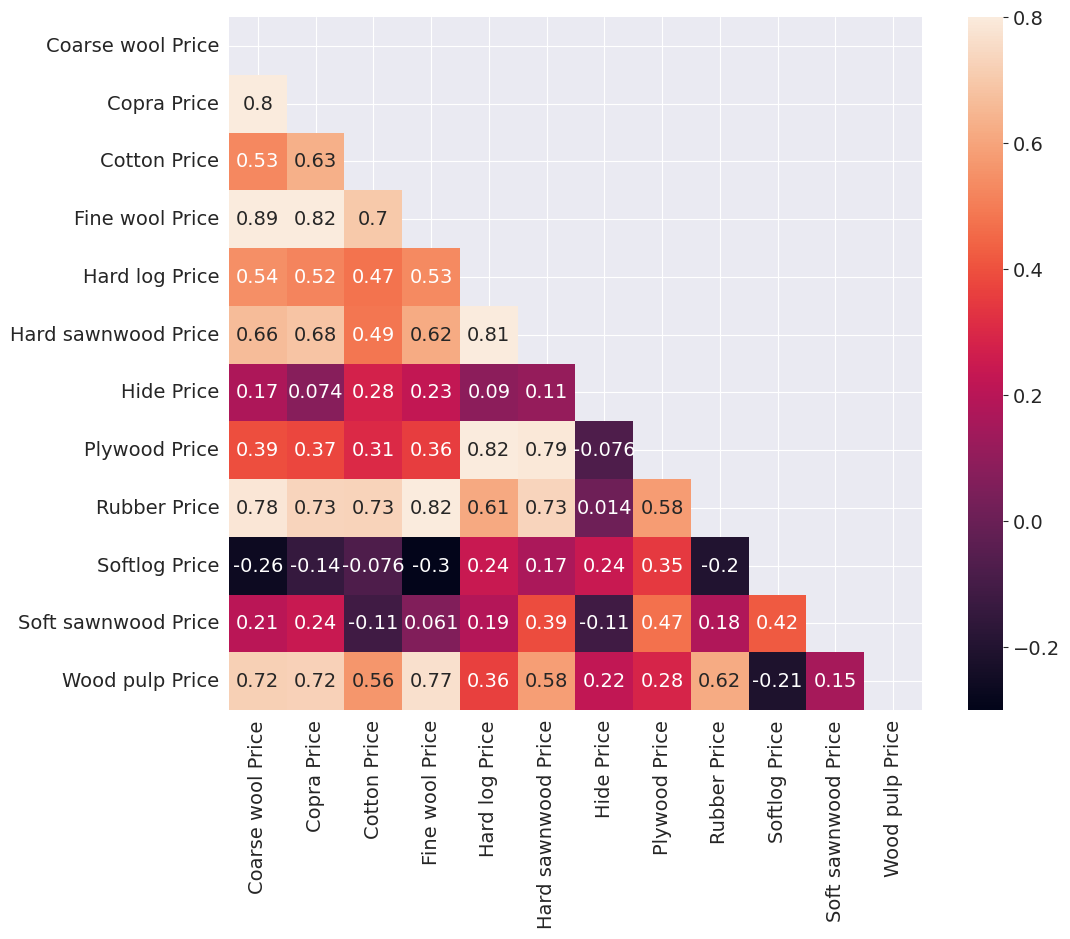

In [56]:
# Lista de matérias
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
            'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
# Calcula a matriz de correlação entre os preços das matérias
corrmat = df[raw_data].corr()
# Define o tamanho do gráfico
fig = plt.figure(figsize=(12, 9))
# Cria um mapa de calor (heatmap) da matriz de correlação com valores máximos definidos, máscara e anotações ativadas
sns.heatmap(corrmat, vmax=0.8, mask=mask, square=True, annot=True)
# Exibe o mapa de calor.
plt.show()

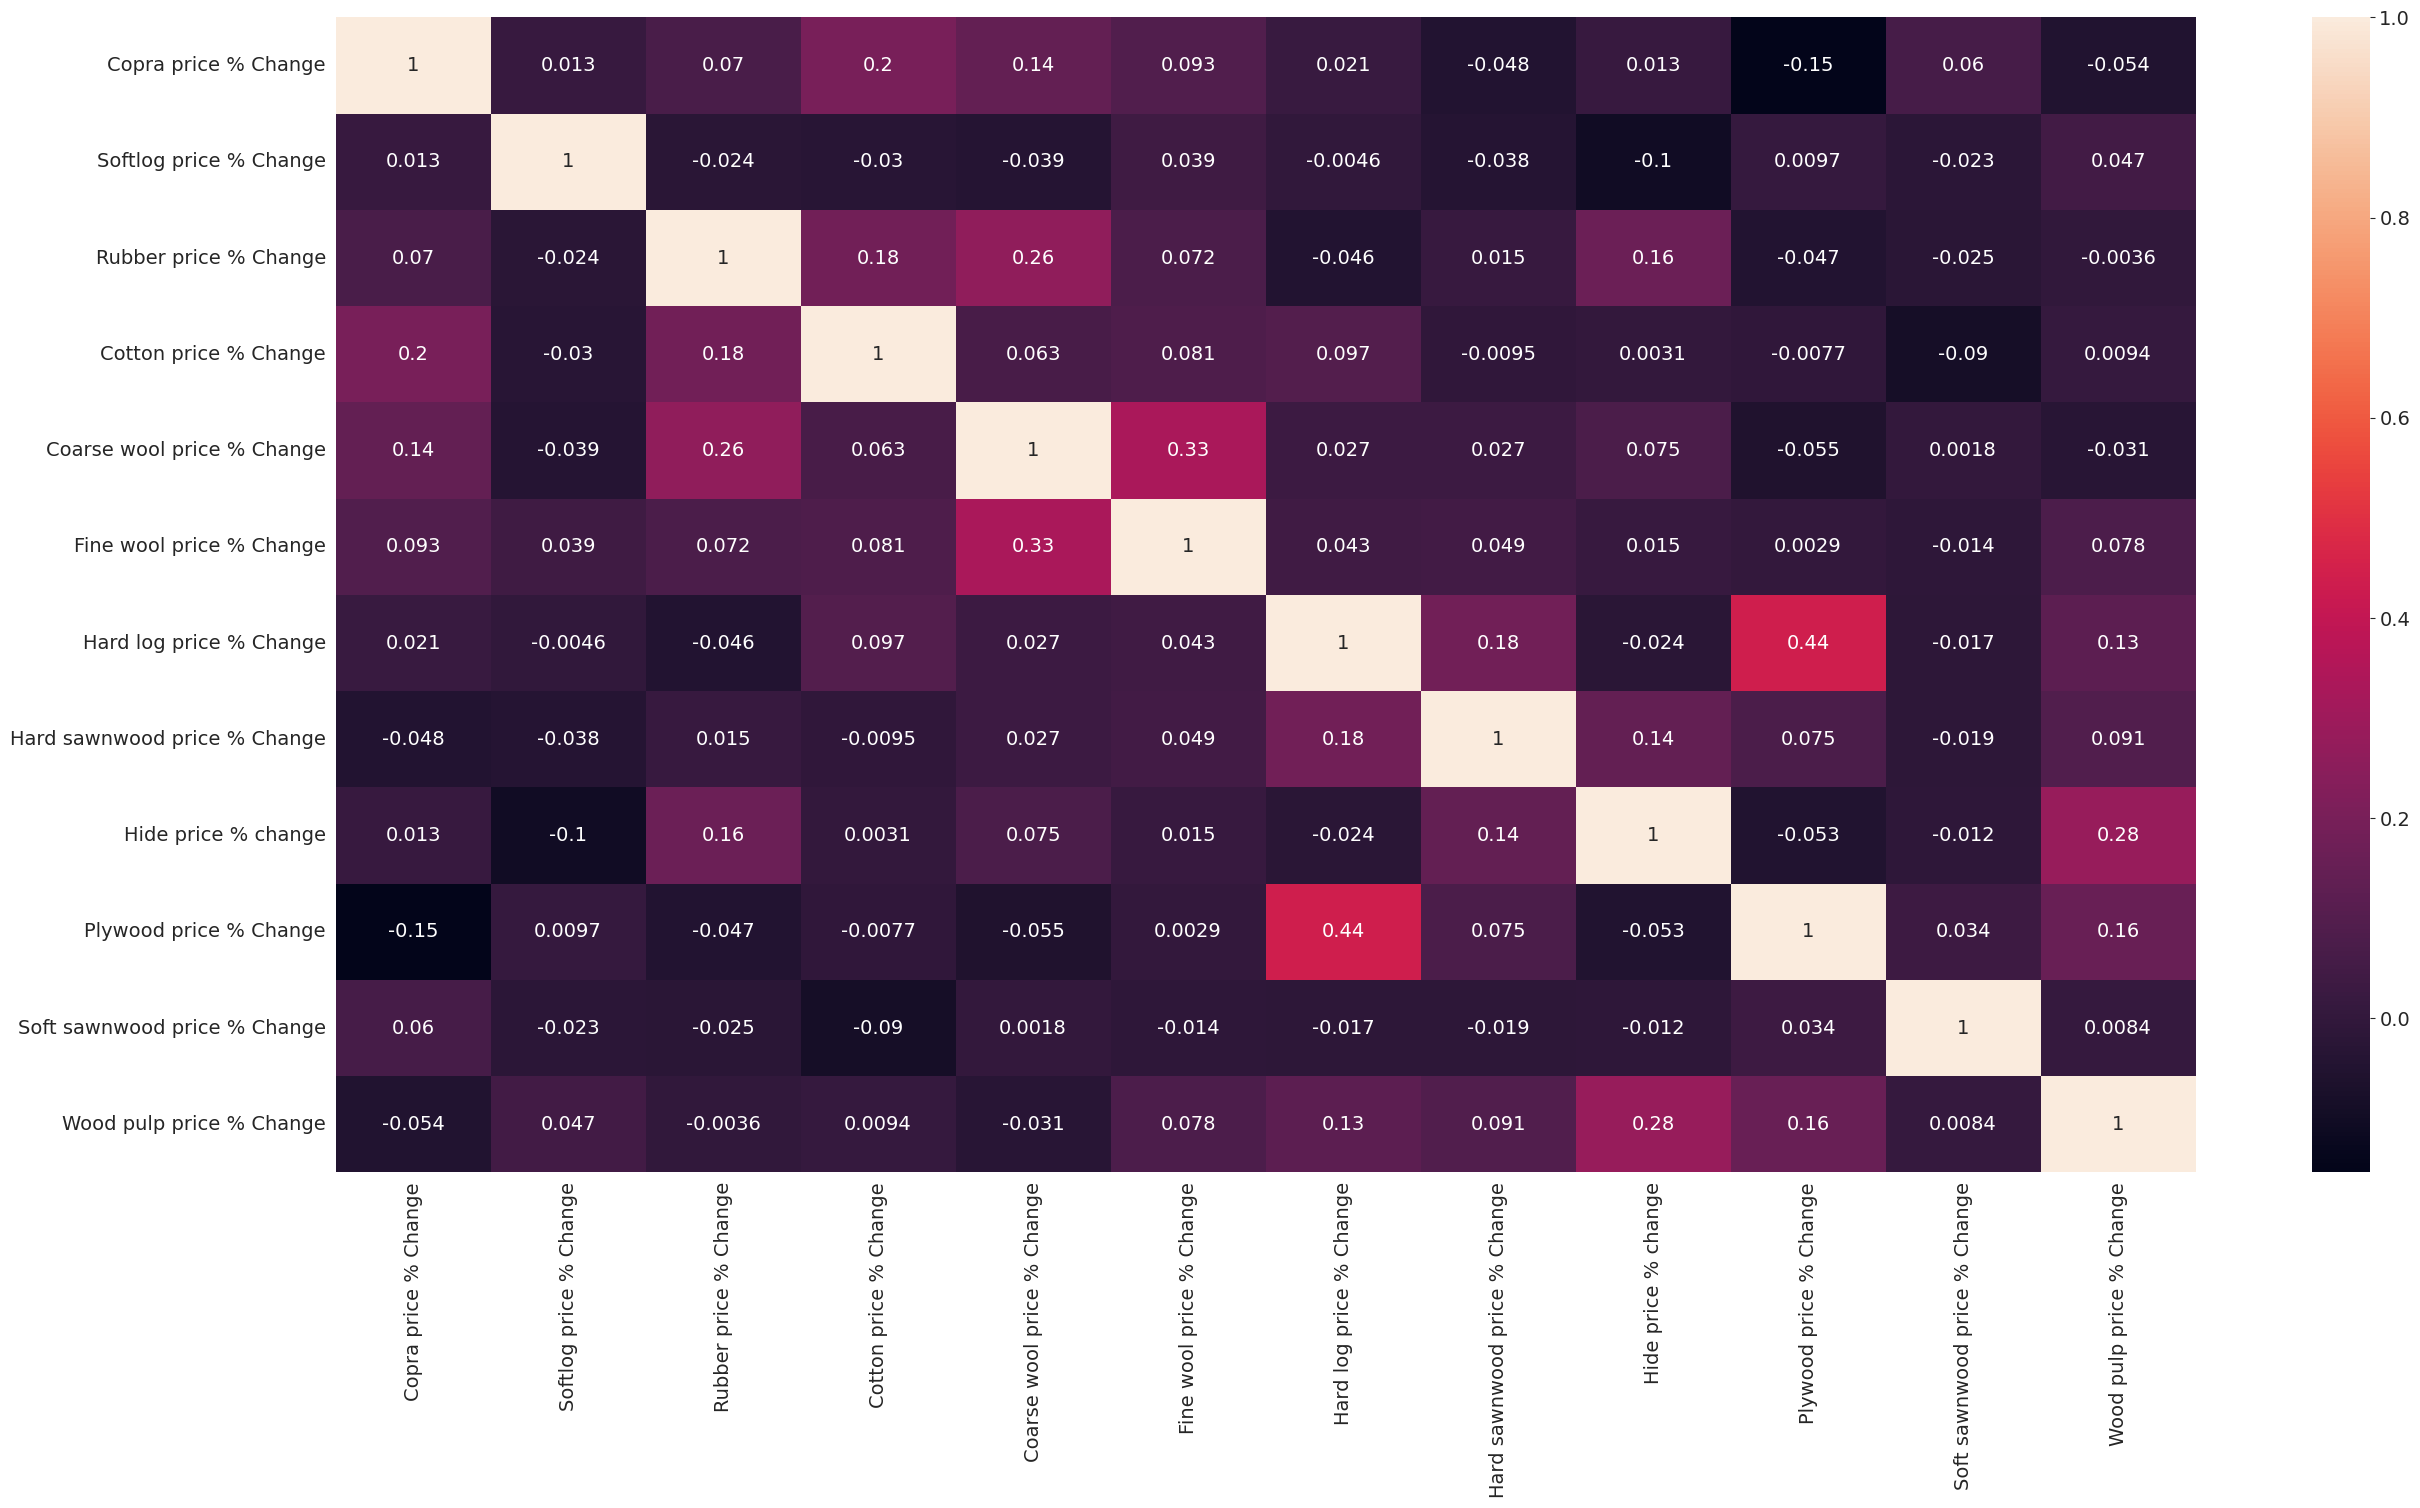

In [57]:
# Cria uma nova figura de tamanho 30x15
plt.figure(figsize=(30, 15))
# Lista de matérias com a porcentagem de mudança
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change',
              'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change',
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# Cria uma matriz de correlação para o conjunto de dados da changelist
corrMatrix = df[changelist].corr()
# Cria um mapa de calor (heatmap) da matriz de correlação com valores anotados
sns.heatmap(corrMatrix, annot=True)
# Exibe o mapa de calor
plt.show()

**Deep Dive** - Algodão

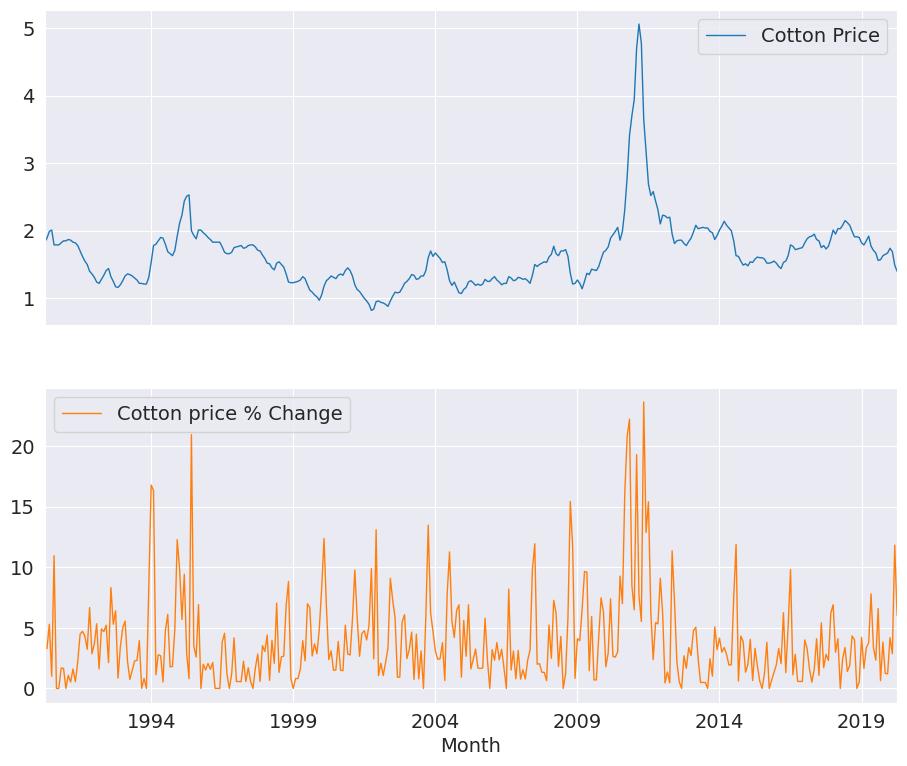

In [58]:
# Cria um gráfico de linha com dois subplots, "Cotton Price" e"Cotton price % Change", ambos os subplots têm o mesmo tamanho de 11x9 e linhas de largura 1
axes = df[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

variação do preço de cada matéria-prima

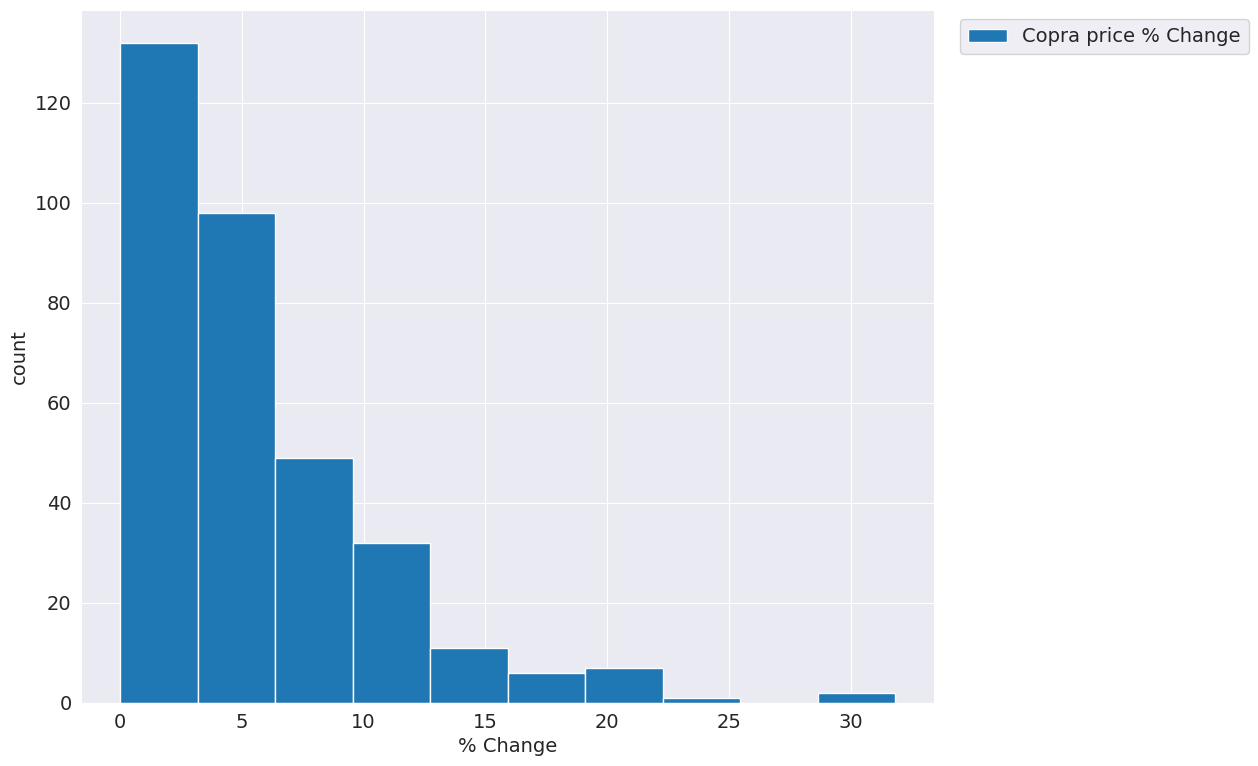

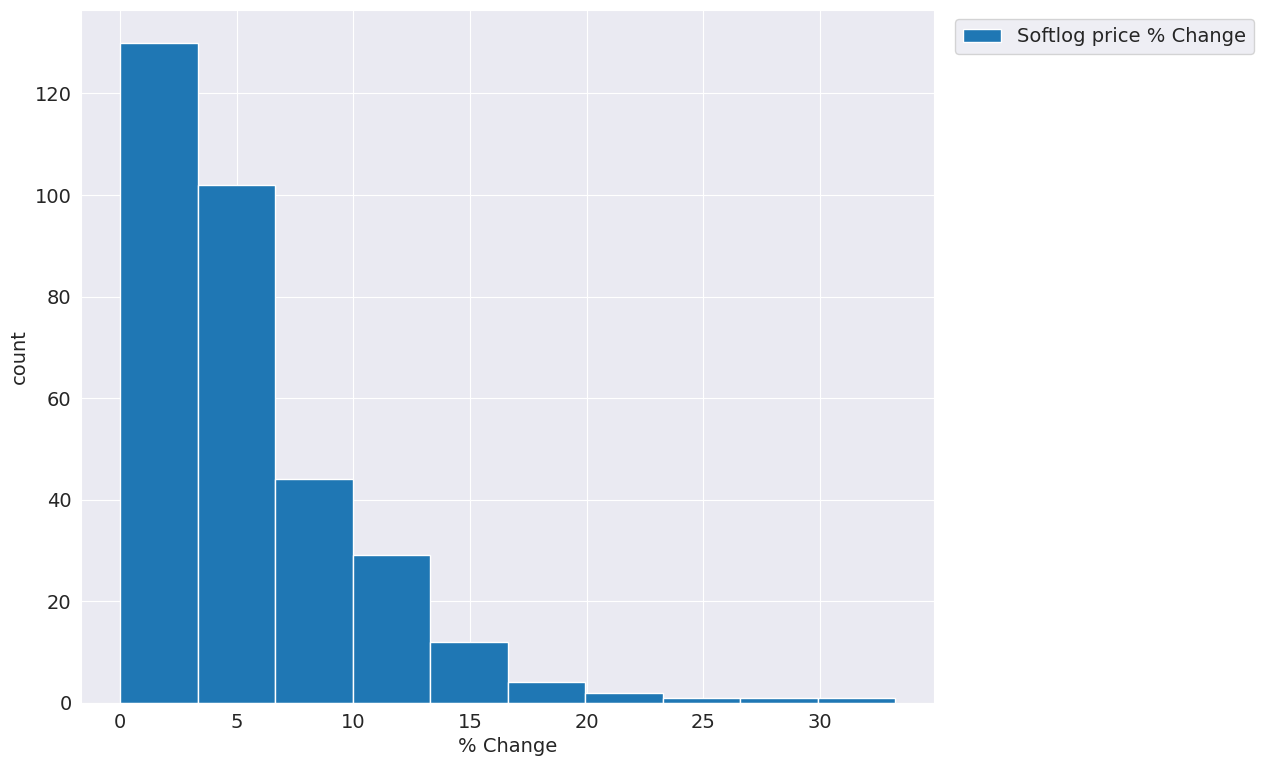

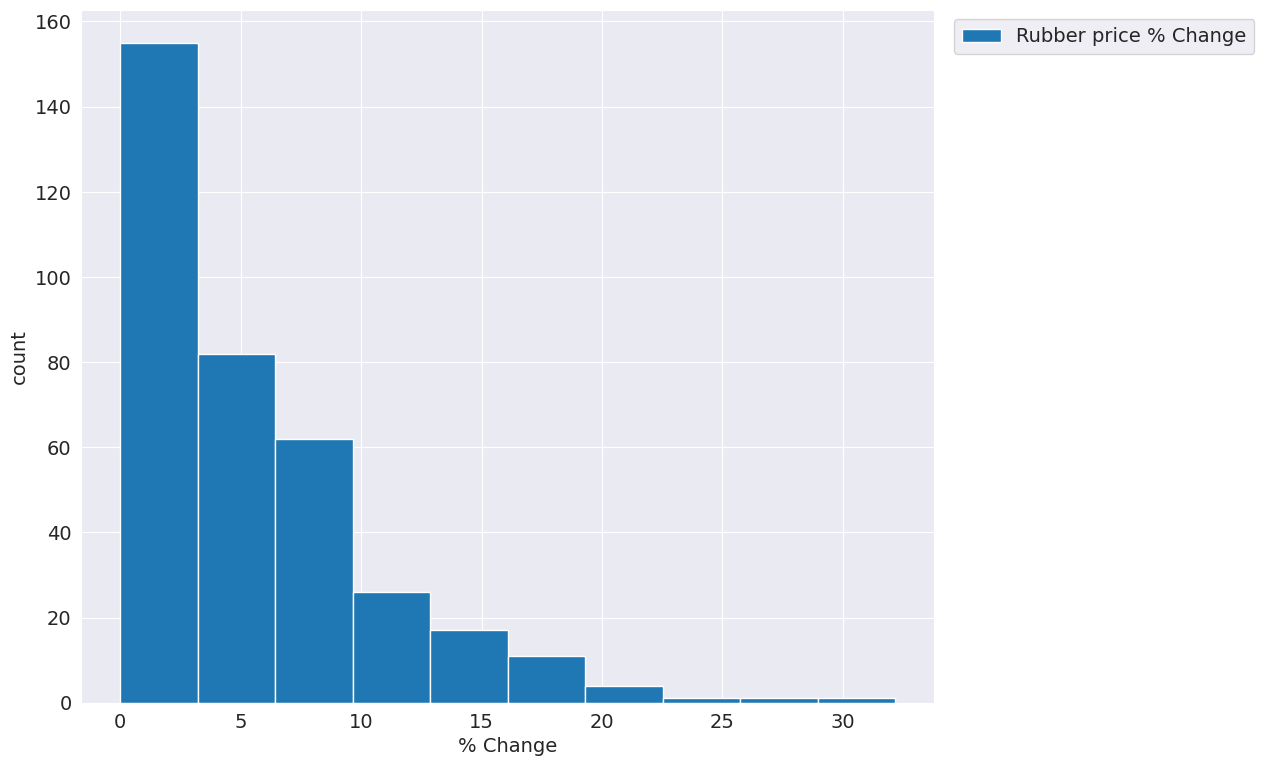

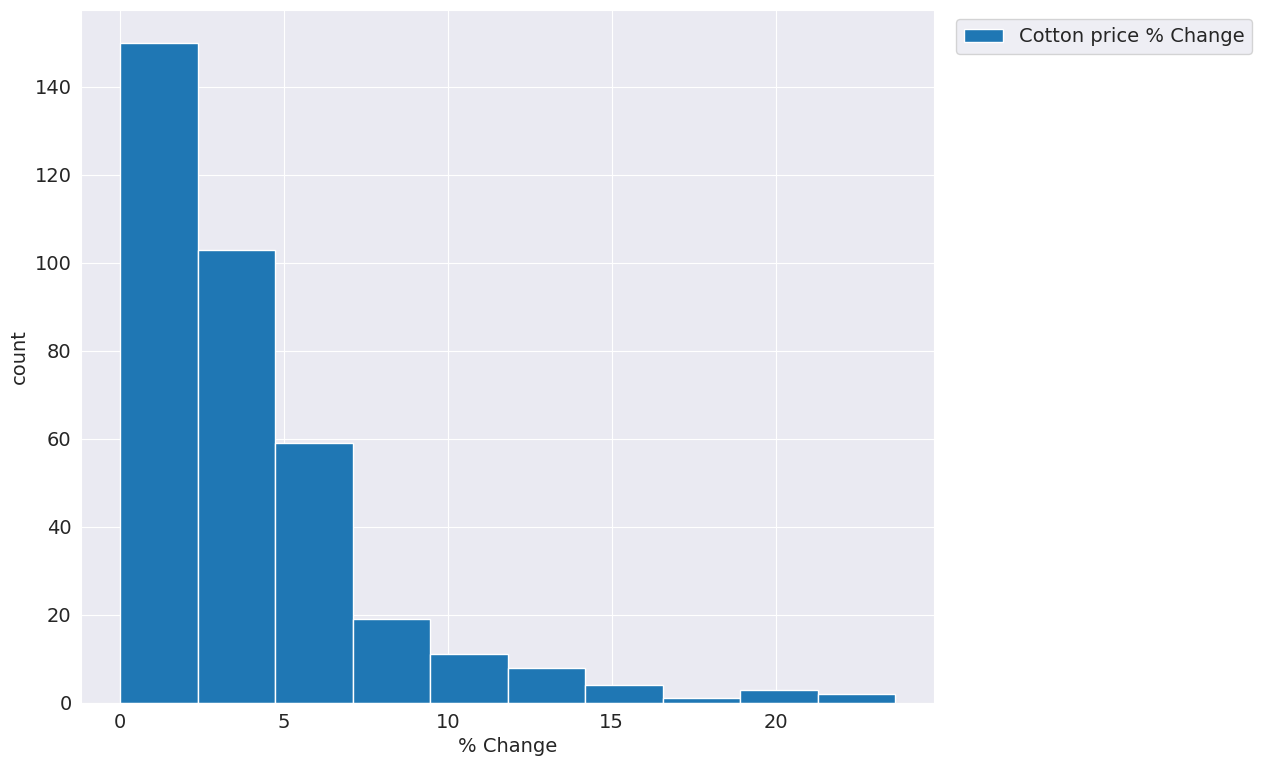

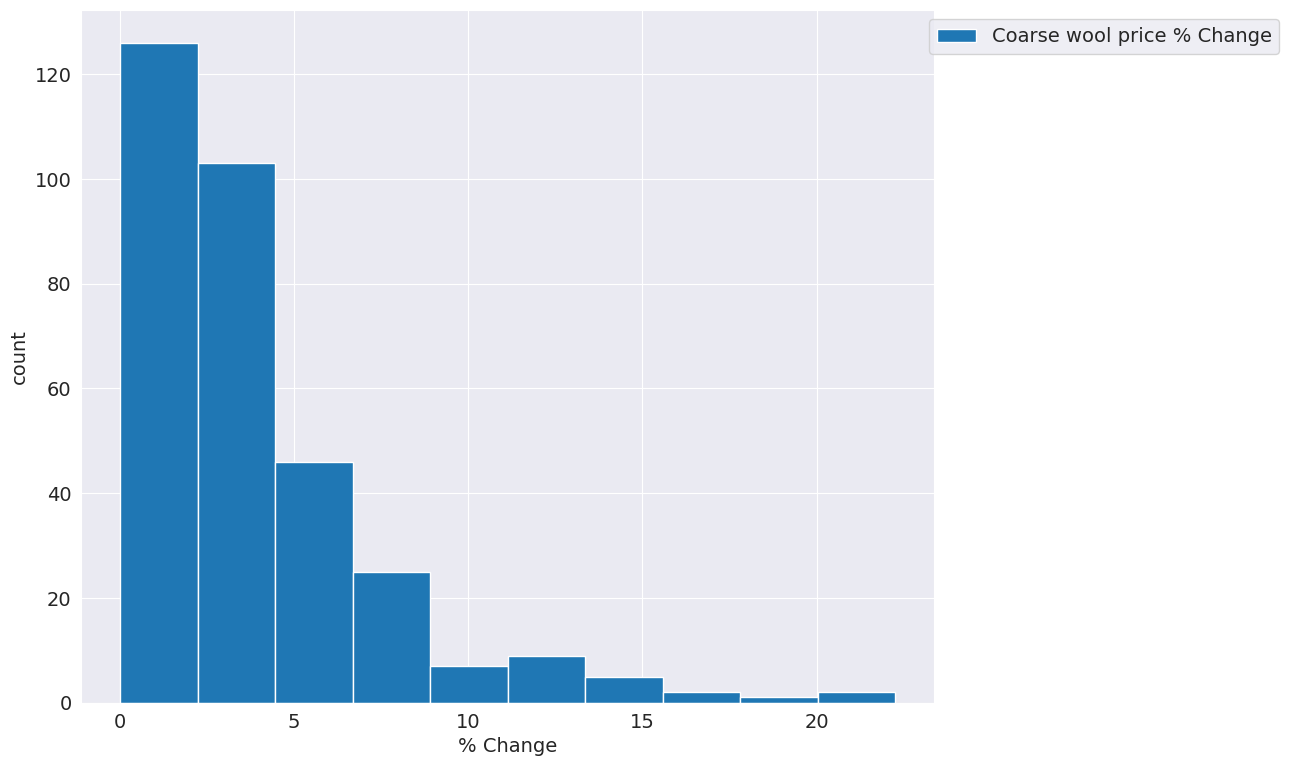

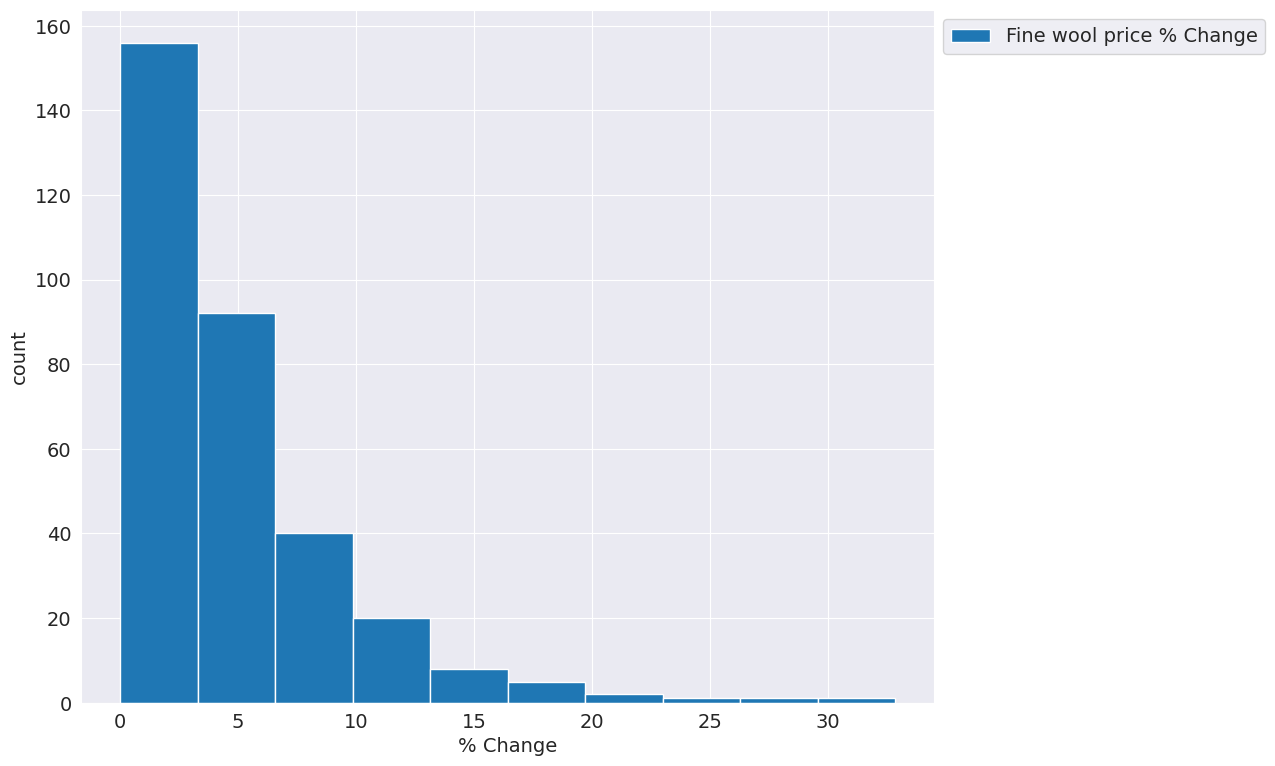

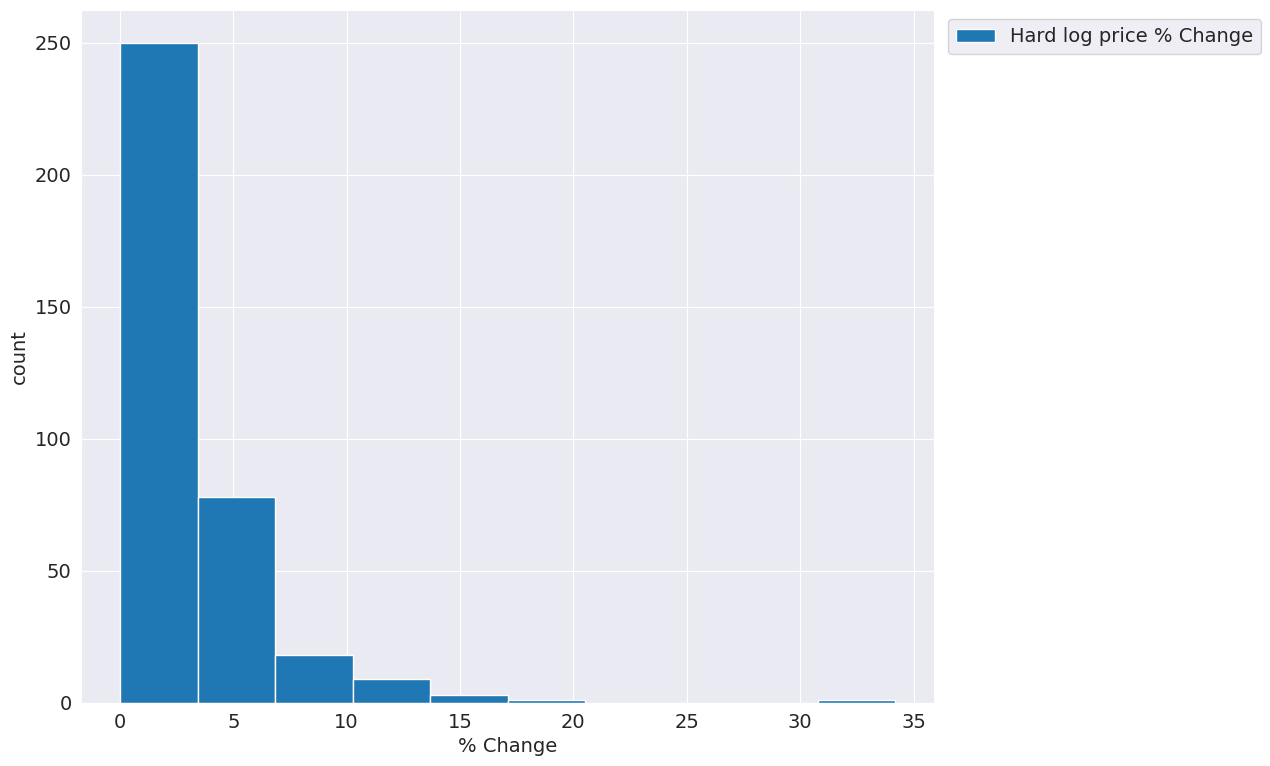

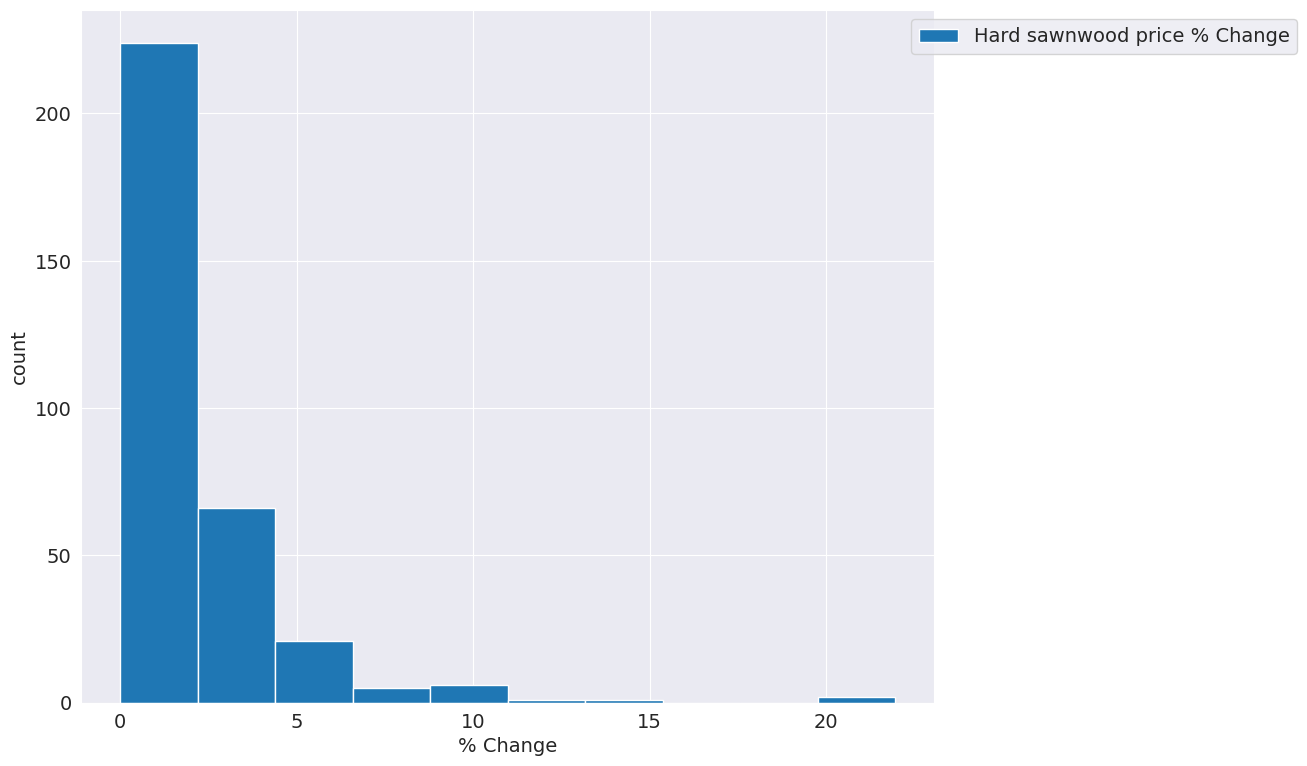

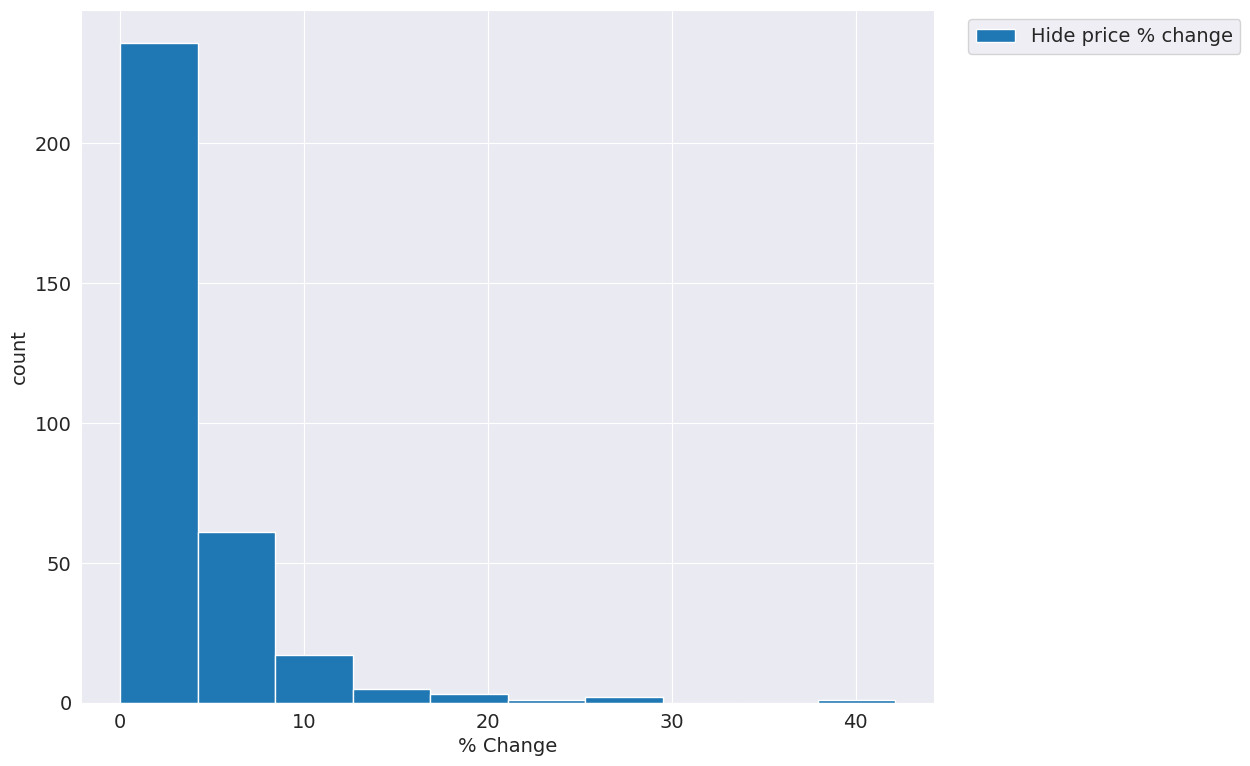

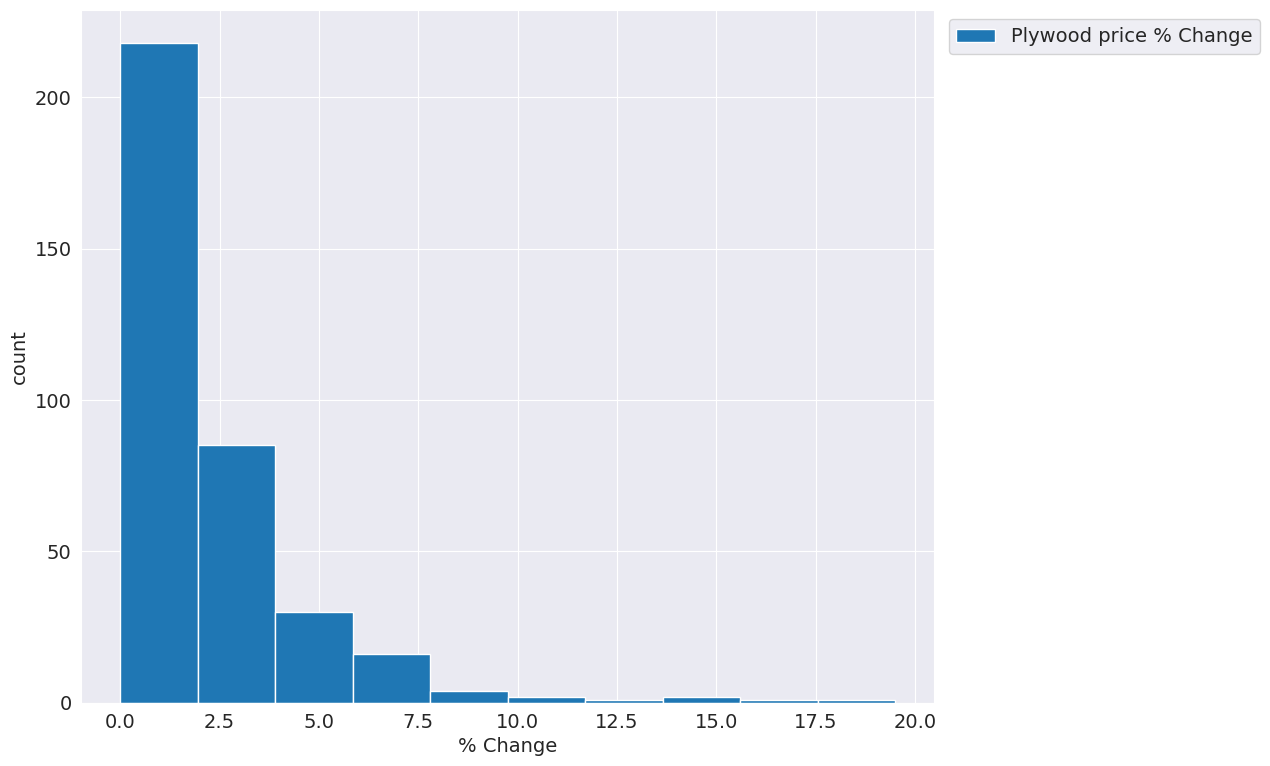

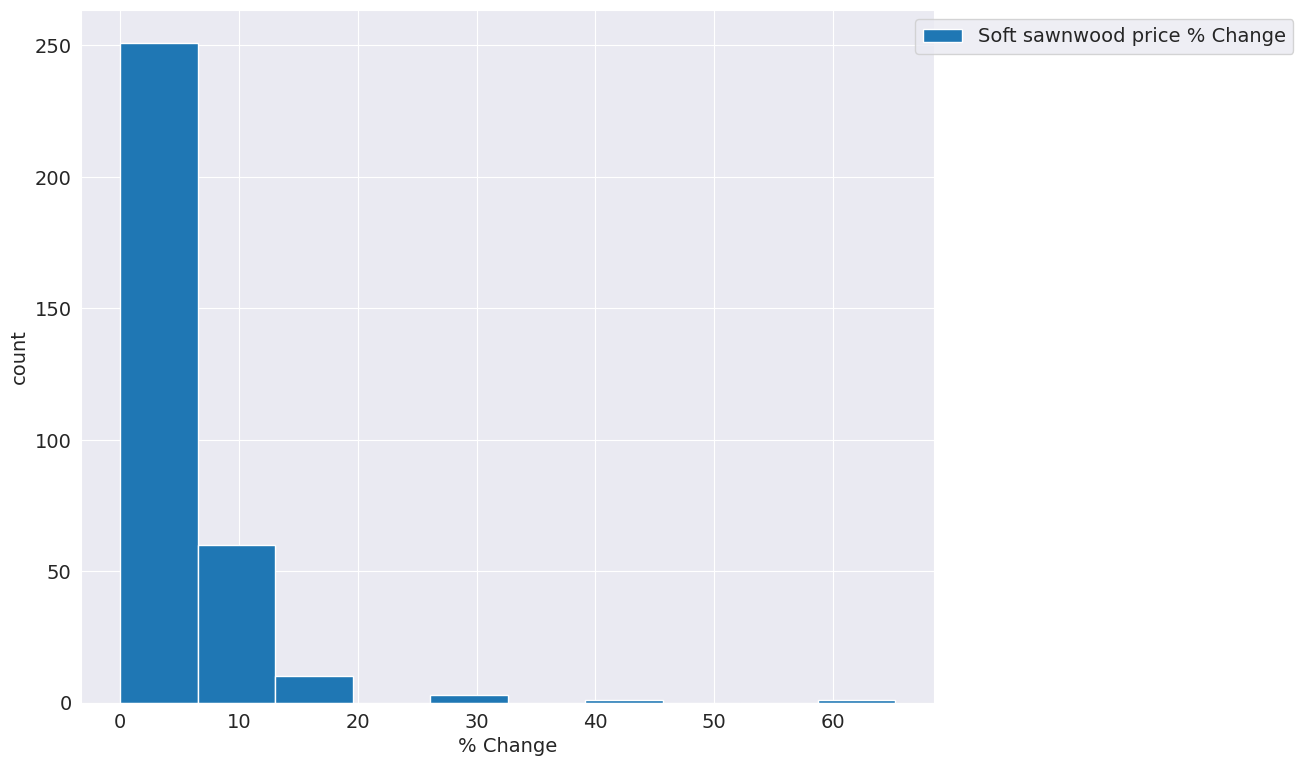

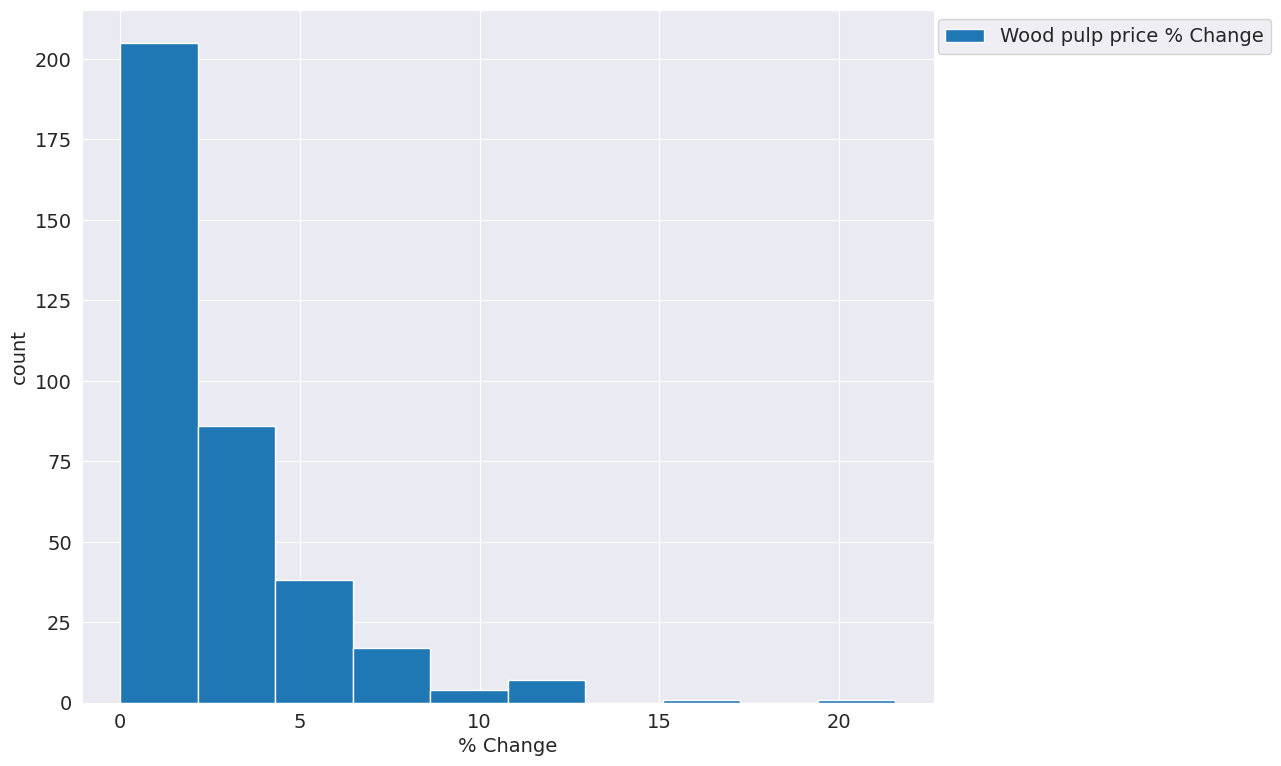

In [59]:
# Lista de nomes das matérias com porcentagem de mudança
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change',
              'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change',
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# Loop para gerar gráficos para cada elemento da changelist
for i in range(len(changelist)):
    plt.figure(figsize=(12, 12))
    # Plotdos dados de mudança percentual para o elemento atual da changelist
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    # Define um rótulo para o eixo X
    plt.xlabel('% Change')
    # Define um rótulo para o eixo Y
    plt.ylabel('count')
    # Adiciona uma legenda a partir do elemento atual
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2, 1))


Nesta analise percebesse que a maioria das matérias possui uma variação frequente inferior a 5%.

**Graficos exibindo a comparação de variação de preços da matérias ao longo dos anos**

Text(0.5, 0.98, 'Raw-Materials price comparision')

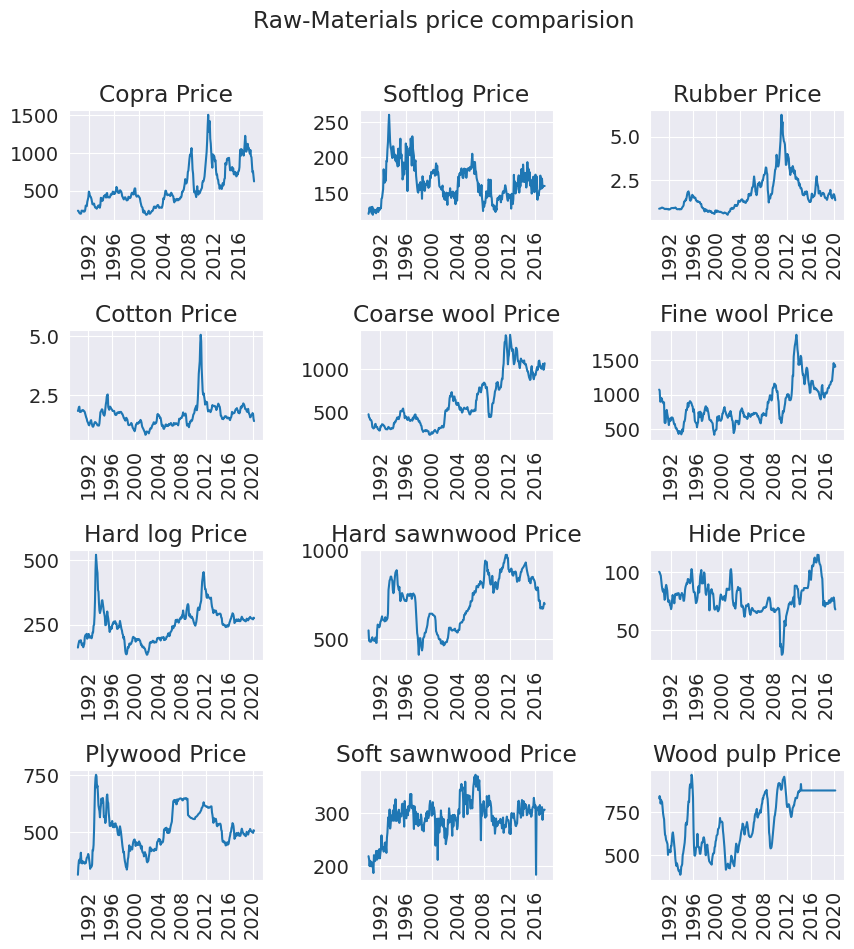

In [60]:
# Cria uma nova figura de tamanho 10x10 polegadas para os subplots
plt.figure(figsize=(10, 10))
# Lista das matérias para plotagem
materialslist = ['Copra Price', 'Softlog Price', 'Rubber Price', 'Cotton Price', 'Coarse wool Price',
                 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price',
                 'Soft sawnwood Price', 'Wood pulp Price']

# Percorre cada matéria na lista e cria subplots de 4x3
for i in range(len(materialslist)):
    plt.subplot(4, 3, i+1)

    # Ajusta o espaçamento vertical e horizontal
    plt.subplots_adjust(hspace=1, wspace=0.5)

    # Define um título para o subplot atual com o nome da matéria
    plt.title(materialslist[i])

    # Desenha os dados do material atual no subplot.
    plt.plot(df[materialslist[i]])

    # Rotaciona os rótulos do eixo X para facilitar a leitura
    plt.xticks(rotation=90)

# Adiciona um título principal para a figura
plt.suptitle("Raw-Materials price comparision")

É possível observar que os que possuem os menores preços são o algodão, a borracha e a pele.

**Dril Down** das 3 matérias de menor preço (algodão, a borracha e a pele)

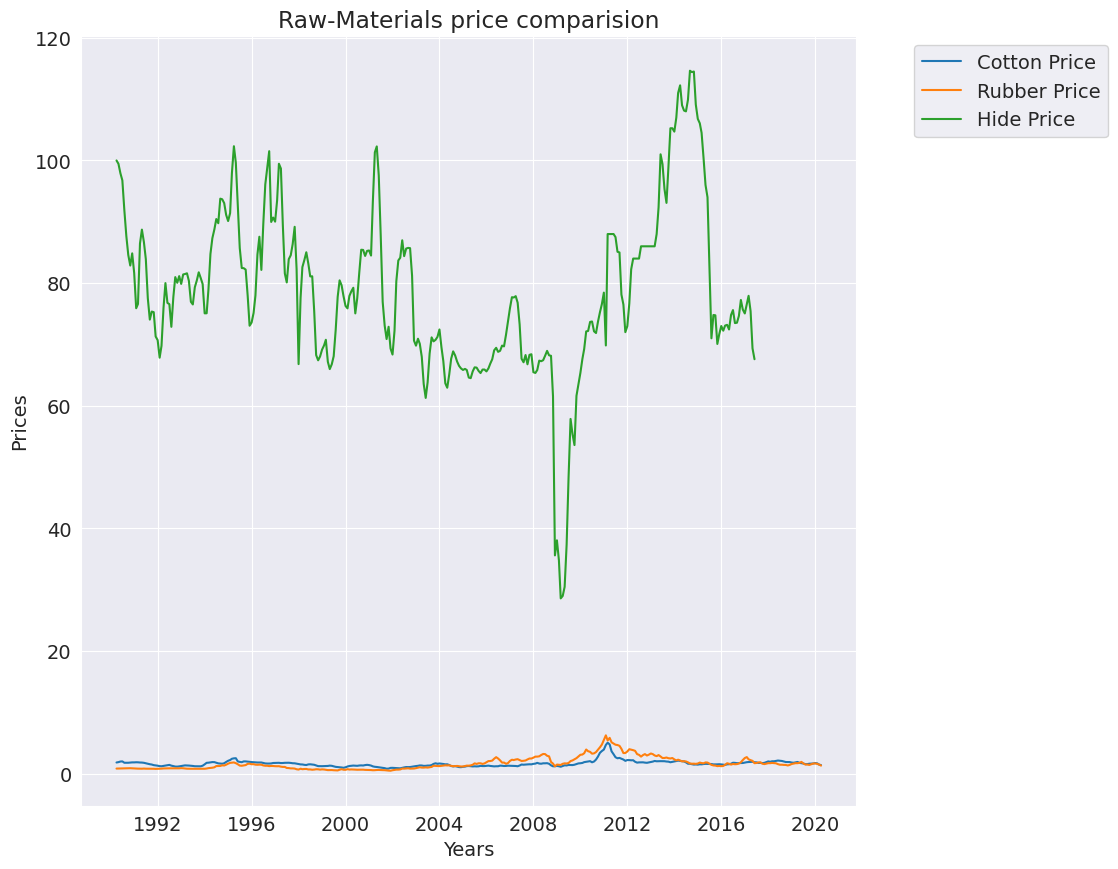

In [61]:
# Cria uma nova figura de tamanho 10x10 polegadas
plt.figure(figsize=(10, 10))
# Plota os dados de três matérias-primas: algodão, borracha e "Hide Price"
plt.plot(df[['Cotton Price','Rubber Price','Hide Price']])
# Define o título do gráfico
plt.title("Raw-Materials price comparision")
# Define o rótulo do eixo X
plt.xlabel('Years')
# Define o rótulo do eixo Y
plt.ylabel('Prices')
# Adiciona a legenda das linhas do gráfico
plt.legend(['Cotton Price','Rubber Price','Hide Price'], loc='upper center', bbox_to_anchor=(1.2,1))


Podemos obervar que o valor entre a pele e as outras 2 materias é muito desigual.
**Drill Down** de algodão e borracha.

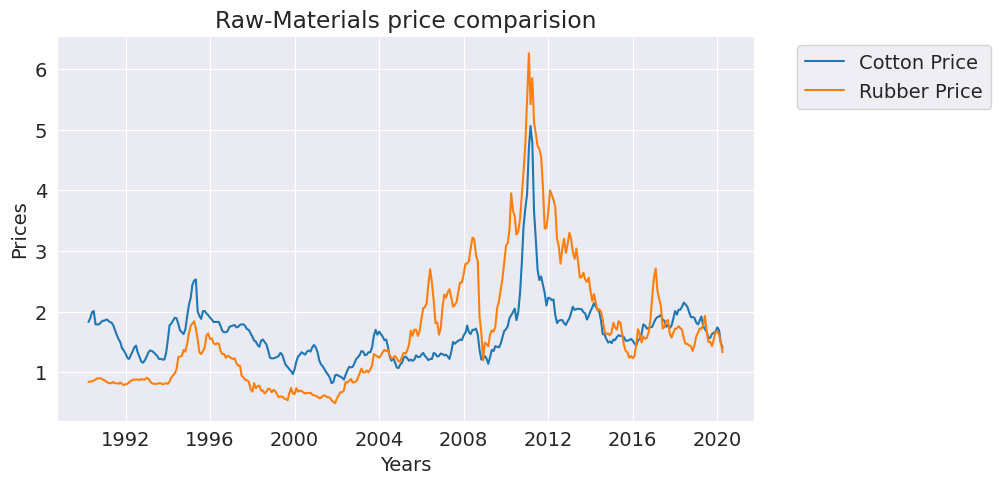

In [62]:
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

Agora neste grafico, podemos dizer que o preço do algodão é o mais baixo nos ultimos anos.

Agora faremos um grafico para obervar quais são as maiores e menores variações percentuais nos preços das matérias.

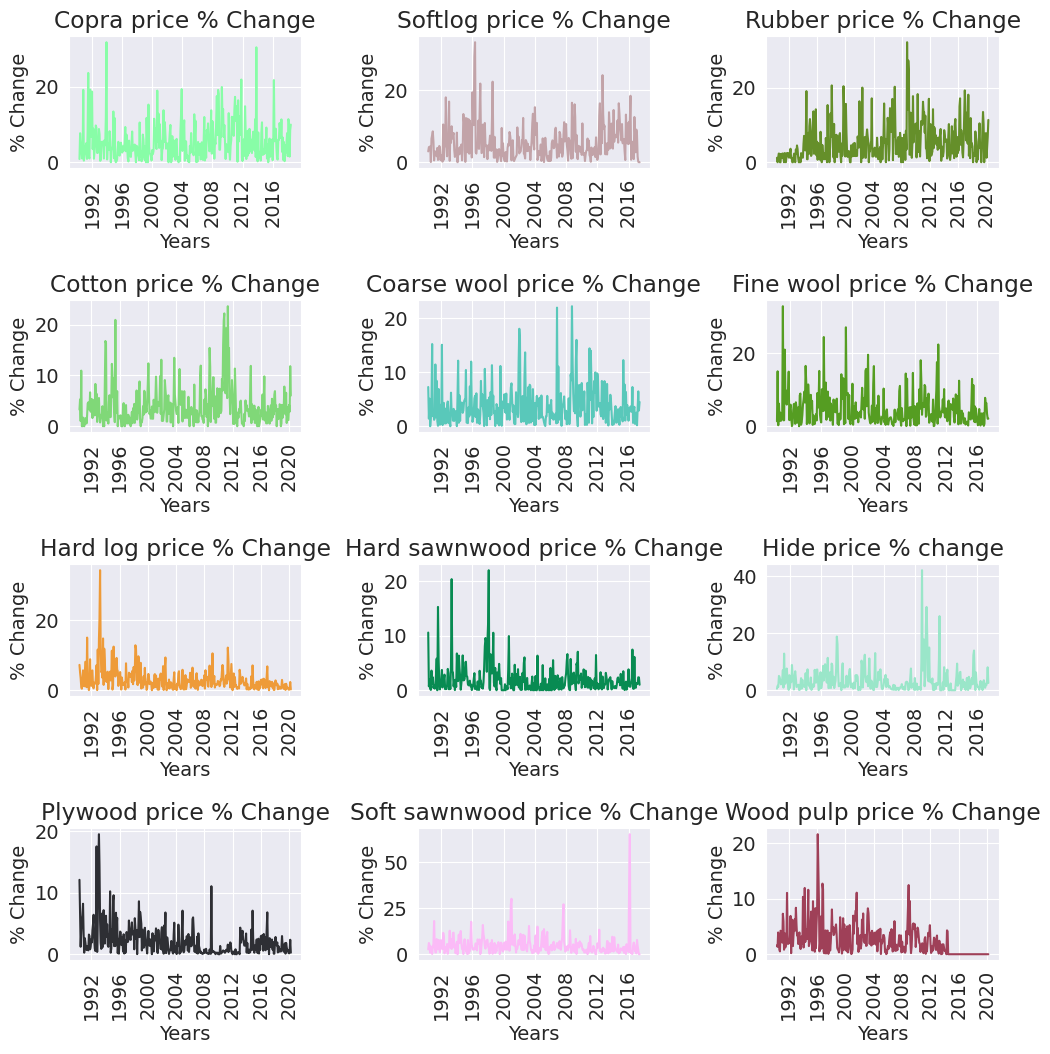

In [49]:
# Cria uma nova figura de tamanho 12x12 polegadas que será usada para exibir todos os subplots.
plt.figure(figsize=(12,12))

# Percorre cada elemtento da 'changelist'
for i in range(len(changelist)):
    #Geram números aleatórios para criar uma cor aleatória para o gráfico atual
    r = random.random()
    b = random.random()
    g = random.random()

    # Cria uma tupla com os valores de r, g e b para definir a cor
    color = (r, g, b)
    # Define um subplot dentro da figura 4x3, onde i+1 representa o número do subplot atual
    plt.subplot(4,3,i+1)
    # Ajusta o espaçamento vertical e horizontal
    plt.subplots_adjust(hspace=1 ,wspace=0.5)
    # Desenha o gráfico atual usando a cor aleatória definida anteriormente
    plt.plot(df[changelist[i]],c=color)
    # Rotaciona os rótulos do eixo X em 90 graus para facilitar a leitura
    plt.xticks(rotation=90)
    # Define um título para o gráfico de linha com o nome do elemento atual
    plt.title(changelist[i])
    # Define o rótulo para o eixo X
    plt.xlabel('Years')
    # Define um rótulo para o eixo y
    plt.ylabel('% Change')

Observa-se que a madeira macia teve a maior mudança em % e a madeira compensada teve a menor.

**Matérias-primas com mudança drástica de preço**

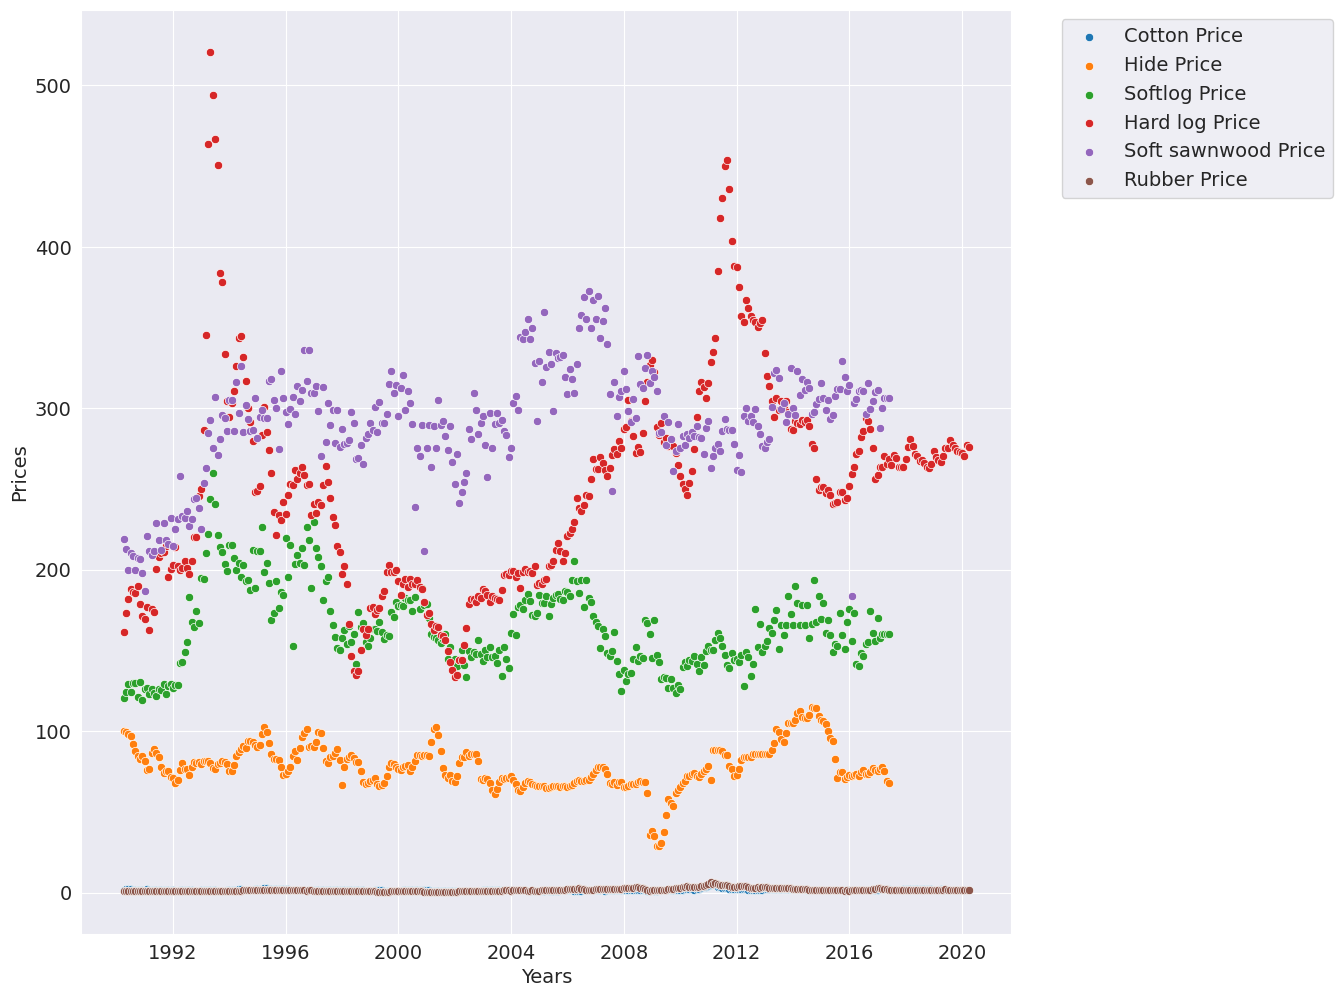

In [63]:
# Define uma lista de matérias-primas de baixa categoria para criar gráficos de dispersão
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
# Cria uma nova figura de tamanho 12x12
plt.figure(figsize=(12, 12))
# Define o rótulo do eixo Y
plt.ylabel('Prices')
# Define o rótulo do eixo X
plt.xlabel('Years')
# Loop para criar gráficos de dispersão para cada matéria-prima na lowlist
for i in range(len(lowlist)):
    # Cria um gráfico de dispersão com o ano no eixo X e os preços da matéria-prima no eixo Y
    sns.scatterplot(y=df[lowlist[i]], x=df.index)
    # Adiciona uma legenda para identificar as matérias-primas
    plt.legend(lowlist, loc='upper center', bbox_to_anchor=(1.2, 1))

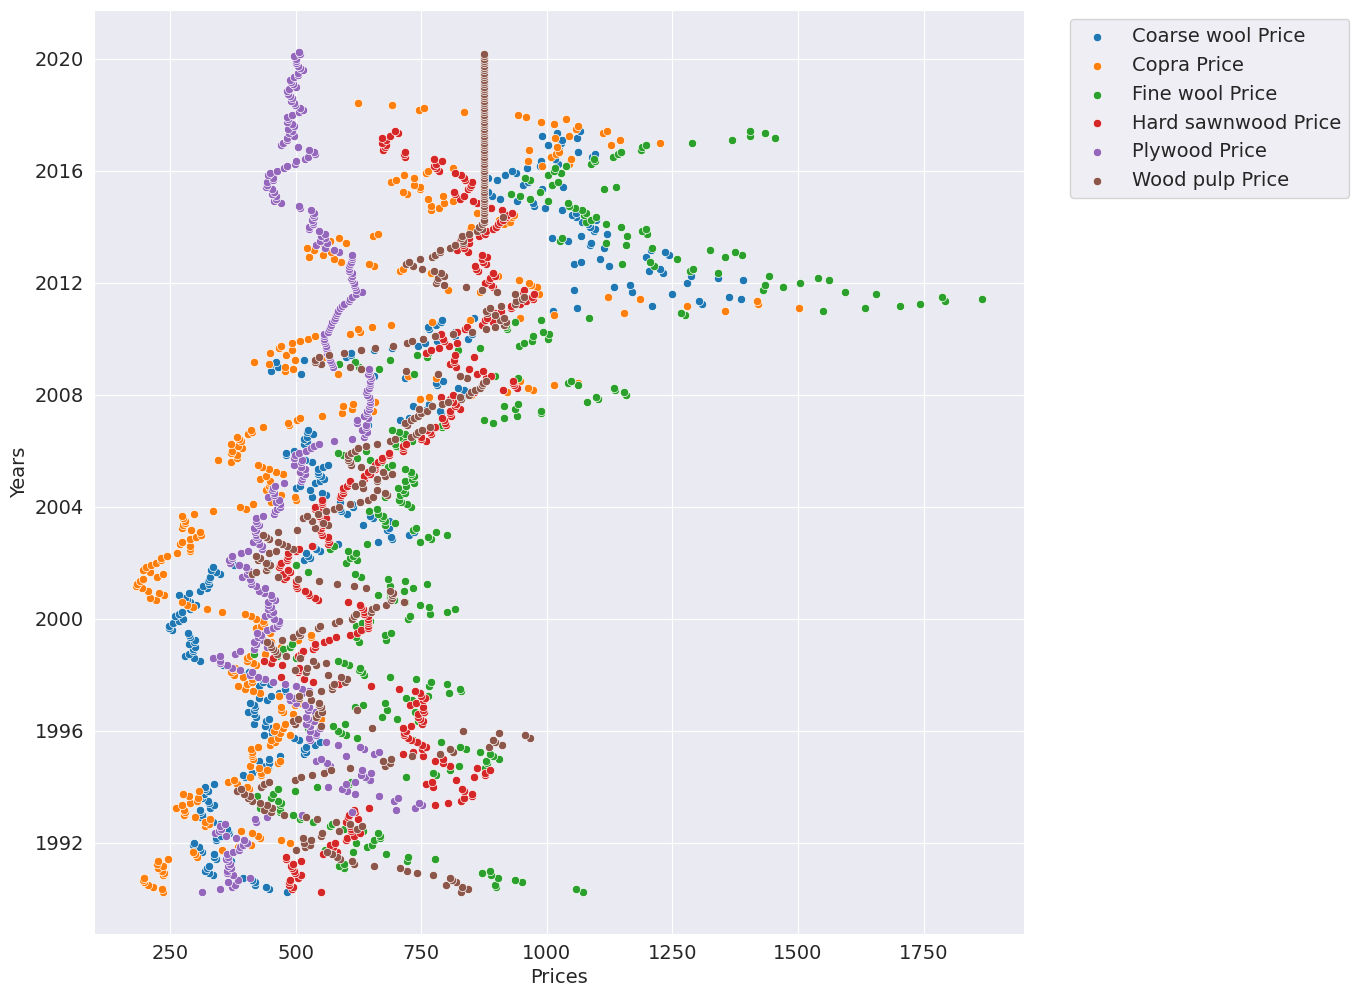

In [65]:
# Define uma lista de matérias-primas de alta categoria para criar gráficos de dispersão
highlist = ['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard sawnwood Price', 'Plywood Price', 'Wood pulp Price']
# Cria uma nova figura de tamanho 12x12
plt.figure(figsize=(12, 12))
# Define o rótulo do eixo X
plt.xlabel('Prices')
# Define o rótulo do eixo Y
plt.ylabel('Years')
# Loop para criar gráficos de dispersão para cada matéria-prima da lista highlist
for i in range(len(highlist)):
    # Cria um gráfico de dispersão com o ano no eixo X e os preços da matéria-prima no eixo Y
    sns.scatterplot(x=df[highlist[i]], y=df.index)
    # Adiciona uma legenda para identificar as matérias-primas
    plt.legend(highlist, loc='upper center', bbox_to_anchor=(1.2, 1))

A maetéria que teve mais mudança drástica de preço para os itens de faixa baixa de preço foi a tora dura e entre materiais de alto preço foi o preço de lã fina

**Faixa de preço das matérias de baixo preço**

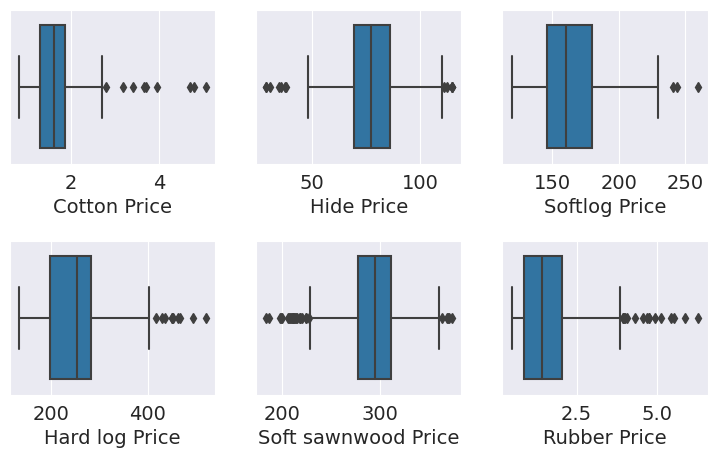

In [66]:
# Lista de matérias-primas de baixa categoria para criar gráficos de caixa
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
# Cria subplots em uma matriz de 2x3, cada subplot representará uma matéria-prima
for i in range(6):
    # Cria um subplot na posição especificada
    plt.subplot(2, 3, i+1)
    # Ajusta o espaçamento vertical entre os subplots
    plt.subplots_adjust(hspace=0.5)
    # Cria um gráfico de caixa para os preços da matéria-prima atual.
    sns.boxplot(x=df[lowlist[i]])

As matérias-primas que possuem mais registros fora da mediana são o algodão e a borracha